# Decision Tree Classification and Regression

# Decision Trees

Decision Trees are a [non-parametric](https://en.wikipedia.org/wiki/Nonparametric_statistics) [supervised machine learning](https://en.wikipedia.org/wiki/Supervised_learning) algorithm that takes a set of training data and constructs a set of regions in the space of features that is then used to make predictions. These predictions can be continuous values (Decision Tree Regression), or classification (Decision Tree Classification).

<img class="wp-image-2353 size-full" src="https://bryantravissmithdotcom.files.wordpress.com/2016/11/decision-tree-algorithm-page-1.png" alt="Decision Tree Process" width="1000" height="580" /> High Level Decision Tree Process[/caption]

![](tree_example.png)

### Algorithm

1. Start at the root node as parent node
2. Split the parent node at the feature ***a*** to minimize the sum of the child node impurities (maximize information gain)
3. Assign training samples to new child nodes
3. Stop if leave nodes are pure or early stopping criteria is satisfied, else repeat steps 1 and 2 for each new child node

####  Decision tree: classification and regression

* Each path from root to a leaf defines a region $R_{m}$ of input space

* Let $\left\{\left(x^{\left(m_{1}\right)}, t^{\left(m_{1}\right)}\right), \ldots,\left(x^{\left(m_{k}\right)}, t^{\left(m_{k}\right)}\right)\right\}$ be the training examples that fall into
$R_{m}$

*  __Classification tree__:

    - discrete output 

    - leaf value $y^{m}$ typically set to the most common value in $\left\{t^{\left(m_{1}\right)}, \ldots, t^{\left(m_{k}\right)}\right\}$

*  __Regression tree__:

    - continuous output

    - leaf value $y^{m}$ typically set to the mean value in $\left\{t^{\left(m_{1}\right)}, \ldots, t^{\left(m_{k}\right)}\right\}$

### Stopping Rules

- a maximal node depth is reached
- splitting a note does not lead to an information gain

### Criterion

Splitting criterion: Information Gain (IG), sum of node impurities

Objective function: Maximize IG at each split, eqiv. minimize the the impurity criterion


## Decision Trees- Tree Growing Algorithms
There are a good number of algorithms to build decision trees

* CART - Classification And Regression Trees

* ID3 - Iterative Dichotomiser 3
* $C4.5$ - improved $ID3$
* $C5.0$ - improved $C4.5$
* $CHAID$ - Chi - squared Automatic Interaction Detector

Read https://scikit-learn.org/stable/modules/tree.html#tree

### Information Gain (IG)

***Examples below are given for binary splits.***

$$IG(D_{p}, a) = I(D_{p}) - \frac{N_{left}}{N_p} I(D_{left}) - \frac{N_{right}}{N_p} I(D_{right})$$

- $IG$: Information Gain
- $a$: feature to perform the split
- $N_p$: number of samples in the parent node
- $N_{left}$: number of samples in the left child node
- $N_{right}$: number of samples in the right child node
- $I$: impurity
- $D_{p}$: training subset of the parent node
- $D_{left}$: training subset of the left child node
- $D_{right}$: training subset of the right child node



# Impurity (I) Indices


### Entropy

The entropy is defined as
$$I_H(t) = - \sum_{i =1}^{C} p(i \mid t) \;log_2 \,p(i \mid t)$$

for all non-empty classes ($p(i \mid t) \neq 0$), where $p(i \mid t)$ is the proportion (or frequency or probability) of the samples that belong to class $i$ for a particular node $t$; $C$ is the number of unique class labels.

The entropy is therefore 0 if all samples at a node belong to the same class, and the entropy is maximal if we have an uniform class distribution. For example, in a binary class setting, the entropy is 0 if  $p(i =1 \mid t) =1$ or $p(i =0 \mid t) =1$. And if the classes are distributed uniformly with $p(i =1 \mid t) = 0.5$ and $p(i =0 \mid t) =0.5$ the entropy is 1 (maximal), which we can visualize by plotting the entropy for binary class setting below.

![](entropy.png)
![](info_gain.png)

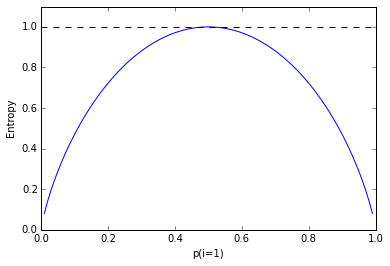

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
plt.plot(x, ent)
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylabel('Entropy')
plt.show()

#### Gini Impurity

Gini Impurity is a very intuitive metric to try to improve because it is a measure of the misclassification rate. If the fraction of the data set that has outcome class $  c  $ is $  f_c  $, we can make predictions for each data point as being class $  c  $, $  f_c  $ of the time. **The error rate for a class is the probability of getting the class times the probability of getting it wrong**.

$$  Error_c = f_c * \left( 1 - f_c \right)  $$

The Gini Impurity is the sum of these error rates for all classes.

$$  Gini \ Impurity = \sum_c Error_c = \sum_c f_c * \left( 1 - f_c \right)  $$
$$  Gini \ Impurity = \sum_c f_c - \sum _c f^2_c  $$
$$  Gini \ Impurity = 1 - \sum _c f^2_c  $$

**If we divide the data set in regions that improve the weighted sum of the Gini Impurity, the misclassification rate will be reduced**.

#### Gini Impurity for a Coin Flip

A coin flip is about as simple as a process there is to calculate the Gini Impurity for. We have a coin with probability of head, $  p_H  $. The Gini Impurity is then
$$  Gini \ Impurity = 1 - p_H^2 - \left(1-p_H\right)^2 = 2*p_H*\left(1-p_H\right)  $$
A plot of the this is below for different values of $  p_H  $.

### Gini Impurity

$$I_G(t) =  \sum_{i =1}^{C}p(i \mid t) \big(1-p(i \mid t)\big)$$

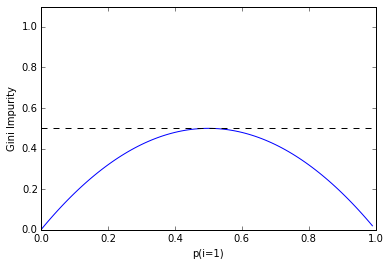

In [5]:
def gini(p):
    return (p)*(1 - (p)) + (1-p)*(1 - (1-p))

x = np.arange(0.0, 1.0, 0.01)
plt.plot(x, gini(x))
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
plt.ylabel('Gini Impurity')
plt.show()

### Misclassification Error

$$I_M(t) =  1 - max\{{p_i}\}$$


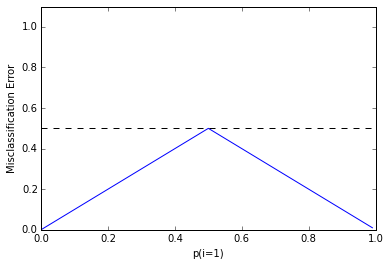

In [6]:
def error(p):
    return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
err = [error(i) for i in x]
plt.plot(x, err)
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
plt.ylabel('Misclassification Error')
plt.show()

### Comparison

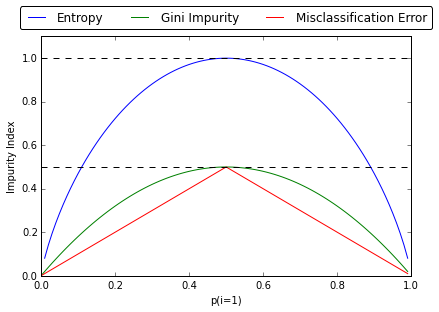

In [7]:
fig = plt.figure()
ax = plt.subplot(111)

for i, lab in zip([ent, gini(x), err], 
                  ['Entropy', 'Gini Impurity', 'Misclassification Error']):
    line, = ax.plot(x, i, label=lab)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.tight_layout()
plt.show()

# Decision Trees - CART

The CART algorithm was published by Breimanet alin 1984

* Find best split for each feature - minimises impurity measure

* Find feature that minimises impurity the most

* Use the best split on that feature to split the node

* Do the same for each of the leaf nodes

The CART algorithm depends on an impurity measure.  It uses Gini impurity. 

Gini impurity measures how often a randomly chosen element from a set would be incorrectly labelled if it was randomly labelled according to the distribution of labels in the set.  The probabilities for each label are summed up

# Decision Trees - ID3

Similar to CART, Iterative Dichotomy 3 (ID3) minimises entropy instead of Gini impurity Entropy:
$$
H(S)=\sum_{x \in X}-p(x) \log _{2} p(x)
$$
Where $S$ is the data set, $X$ is the set of classes in $S, p(x)$ is the proportion of the number of elements in class $x$ to the number of elements in set $S$

Information Gain is measured for a split along each possible attribute $A$
$$
I_{G}(S, A)=H(S)-\sum_{x \in X} \frac{\left|S_{A}\right|}{|S|} H\left(S_{A}\right)
$$
ID3 is very similar to CART, though doesn't technically support numerical values

# Decision Trees - Regression

CART - Classification and Regression Trees How do we usedecision trees for regression?  i.e.  to give numerical values ratherthan a classification.

Could use classification, but using each numerical value as a class.

* Problems?

    - How would you generalize?
    - Loses all meaning of ordering, or similarity
    
* Solution?
    - Use Variance instead of Gini or Entropy
    
Maximize Variance Gain:

   - Split on the feature values that give maximum gain in variance
   - Should make similar numbers group together
   - I. e.  lower numbers on one side, higher on the other


# Decision Trees - In General

There are problems with Decision Trees:
   - Finding an optimal Tree is NP-complete
   - They overfit, so don't generalize well - Hence need to prune
   - Information Gain is biased to features with more categories
   - Splits are axis aligned.

# Decision Trees - Ensemble Methods

**Bagging**: Bootstrap  aggregating__

Uniformly sample initial dataset with replacement in to $\mathrm{m}$ subsets 

For example:

if data set has 5 samples, $\left(s_{1}, s_{2}, s_{3}, s_{4}, s_{5}\right)$ make a whole bunch of similar data sets:

   - $(s_{5}, s_{2}, s_{2}, s_{1}, s_{5})$
   - $(s_{4}, s_{2}, s_{1}, s_{3}, s_{3})$
   - $(s_{2}, s_{5}, s_{3}, s_{1}, s_{1})$
   - $(s_{3}, s_{1}, s_{2}, s_{4}, s_{4})$
   
Train a different decision tree on each set 

To classify, apply each classifier and chose the correct one by majority vote

If doing regression, take the mean of the values

This improves generalization, as decreases variance without increasing bias

# Decision Trees - Ensemble Methods

**Boosting**

* Learn a sequence of weak trees (small fixed size)

* Gradient tree boosting

**Random Forests**

* Apply bagging but when learning the tree for each subset, chose the split by searching over a random sample of the features

* Reduces overfitting


### Regressions Metrics for Decision Trees

The metric used for decision tree regression is a reduction of  variance around the prediction.

$$  Variance = \frac{1}{N} \sum_{i}^{N} ( y_i - \bar{y} )^2  $$

#### Simple Linear Example

We can take a simple linear example and split it into two regions. The solid black line is the average of the entire dataset, while the red lines are the predictions in each region.

<img class="aligncenter size-full wp-image-2747" src="https://bryantravissmithdotcom.files.wordpress.com/2016/12/output_11_0.png" alt="output_11_0" width="768" height="384" />

The total variance before the split was 40.00, while the weighted variance after the split is $  \frac{6}{11} 11.67 + \frac{5}{11} 8.00  = 10.0 $

## Improving Metrics - Splitting on Ibnformation Gain

Now that we have metrics to evaluate the prediction from a data set, we can now define the improvement metric to optimize. I will be using the term information gain, which it is the correct term when talking about entropy, for all the optimizations. I can not say conclusively is the name for the measure in decision tree regression. Being wrong hasn't stopped me before!

### Decision Tree Classifier 

$$  Information \ Gain = Gini \ Impurity(d) - \sum_{split \ s} \frac{|s|}{|d|} Gini \ Impurity(s)  $$

$$  Information \ Gain = Entropy(d) - \sum_{split \ s} \frac{|s|}{|d|} Entropy(s)  $$

### Decision Tree Regressor
 

$$  Information \ Gain =  Variance(d) - \sum_{split \ s} \frac{|s|}{|d|} Variance(s)  $$

## Parameters of Decision Trees

Decisions Trees are prone to overfit because the metrics can be driven to the minimum by making the tree deep enough capture each data point individually. The variance of a single point is zero. The misclassification rate of a single point is also zero. Traditionally this overfit is managed by pruning the tree after it is constructed, or setting parameters the limit how finely the data can be partitioned into regions.

The post-pruning of a decision tree uses some sort of statistical evaluation on a validation set. If the error on the sub-nodes is larger than the node, the sub-nodes are removed.

The parameters that are commonly used in CART to limit the partitioning of the data:

1. Maximum Depth of the Tree
2. Minimum Number of Data Points for a New Node
3. Minimum Improvement needed for a New Node
4. Minimum Metric under which New Nodes are not created.

## Pseudo Code
Now that we have a metric and measure of improvement, we can outline the pseudo code we will be implementing in the next posts which are based on the CART algorithm for decision trees. Classification and Regression Trees (CART) algorithm that recursively and greedily splits nodes if there is an improve in the metric of choice until some stopping conditions are met.

<ol>
	<li>Set Training Parameters</li>
	<li>Create a Root Node</li>
	<li>Determine optimal split the node such that that split minimizes the metrics of concern.</li>
	<li>If stopping parameters are not violated, create two child nodes and apply step 3 and 4 to each child node.</li>
</ol>

# Code

In this code section. I am going to be implementing a Decision Tree algorithm, but I will do it in the following parts:

<ol>
	<li>Introduce the Data</li>
	<li>Script Finding the Best First Partition</li>
	<li>Create a Data Structure and Implement Decision Trees</li>
	<li>Comparing with sklearn package.</li>
</ol>

## Assumptions
The implementation will avoid some issues with decision trees. I am going to assume that there never missing values. I will assume that all categorical variables are logical, character, and factor variables. If a variable is numeric, I will assume it is numeric. I am also going to assume that all the data is in a data.frame format.

## Data

Let's use  the Iris dataset for classification and the Boston dataset for regression. Both are available in the sklearn package.

In [2]:
from sklearn.datasets import load_iris,load_boston
iris = load_iris()
boston = load_boston()

### Boston Housing Price

In [3]:
import pandas as pd
bostonX = boston['data']
bostonY = boston['target']
bostonDF = pd.DataFrame(data = np.hstack((bostonX,bostonY.reshape(bostonY.shape[0],1))),\
                        columns=np.append(boston['feature_names'],'PRICE'))
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Iris

In [4]:
irisX = iris['data']
irisY = iris['target']
irisDF = pd.DataFrame(data = np.hstack((irisX,irisY.reshape(irisY.shape[0],1))),\
                        columns=np.append(iris['feature_names'],"Species"))
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Scripting the First Partition

Let's implement a brute force search for the best partition in the data set. This will be done by going through each value in each feature and finding the feature-value that will best partition the data. To do this we need to implement our metrics we discussed above:

* Entropy: Classification

* Gini Impurity: Classification

* Variance: Regression

In [5]:
def entropy(y):
    if y.size == 0: return 0
    p = np.unique(y, return_counts = True)[1].astype(float)/len(y)
    return -1 * np.sum(p * np.log2(p+1e-9))

def gini_impurity(y):
    if y.size == 0: return 0
    p = np.unique(y, return_counts = True)[1].astype(float)/len(y)
    return 1 - np.sum(p**2)

def variance(y):
    if y.size == 0: return 0
    return np.var(y)

Calculate these metrics for the iris dataset

In [6]:
print (entropy(irisY))
print (gini_impurity(irisY))
print (variance(bostonY))

1.584962496393071
0.6666666666666667
84.41955615616556


## Information Gain

Next calculate the improvement for different partitions. Each partition is going to be calculated using a mask which is a logical vector that states if the row is in the first partition (TRUE) or in the second partition (FALSE). We will call the function information gain, even though it really is only information gain if entropy is the metric.

In [7]:
def information_gain(y,mask,func=entropy):
    s1 = np.sum(mask)
    s2 = mask.size - s1
    if (s1 == 0 | s2 == 0): return 0
    return func(y) - s1/float(s1+s2) * func(y[mask]) - s2/float(s1+s2) * func(y[np.logical_not(mask)])


print (information_gain(irisY,irisX[:,2] < 3.5))
print (information_gain(irisY,irisX[:,2] < 3.5,gini_impurity))
print (information_gain(bostonY,bostonX[:,5] < 7))

0.8278615174416875
0.3059067626272451
0.4568846274610028


## Max Information Gain For A Single Feature

We have  a function to calculated the information gain for a given criteria, mask, or split, Now, we will search for the best split among all the values in a given feature. This will give us the best split for that feature:

In [8]:
np.apply_along_axis(lambda x: np.sum(x),0,irisX)

array([876.5, 458.6, 563.7, 179.9])

In [10]:
def max_information_gain_split(y,x,func=gini_impurity):
    best_change = None
    split_value = None
    is_numeric = irisX[:,2].dtype.kind not in ['S','b']
    
    for val in np.unique(np.sort(x)):
        mask = x == val
        if(is_numeric): mask = x < val
        change = information_gain(y,mask,func)
        if best_change is None:
            best_change = change
            split_value = val
        elif change > best_change:
            best_change = change
            split_value = val
            
    return {"best_change":best_change,\
            "split_value":split_value,\
            "is_numeric":is_numeric}

print(max_information_gain_split(irisY,irisX[:,2]))
print(max_information_gain_split(irisY,irisX[:,2],entropy))
print(max_information_gain_split(bostonY,bostonX[:,3],variance))

{'best_change': 0.3333333333333334, 'split_value': 3.0, 'is_numeric': True}
{'best_change': 0.9182958321308963, 'split_value': 3.0, 'is_numeric': True}
{'best_change': 2.5930420368499885, 'split_value': 1.0, 'is_numeric': True}


All the best split values just happen to be 1 in this case.

## Best Feature Split

Now we can apply the max_information gain across all columns and return the information for the best split


In [11]:
def best_feature_split(X,y,func=gini_impurity):
    best_result = None
    best_index = None
    for index in range(X.shape[1]):
        result = max_information_gain_split(y,X[:,index],func)
        if best_result is None:
            best_result = result
            best_index = index
        elif best_result['best_change'] < result['best_change']:
            best_result = result
            best_index = index
    
    best_result['index'] = best_index
    return best_result

print (best_feature_split(irisX,irisY))
print (best_feature_split(irisX,irisY,entropy))
print (best_feature_split(bostonX,bostonY,variance))

{'best_change': 0.3333333333333334, 'split_value': 3.0, 'is_numeric': True, 'index': 2}
{'best_change': 0.9182958321308963, 'split_value': 3.0, 'is_numeric': True, 'index': 2}
{'best_change': 38.22046447905707, 'split_value': 6.943, 'is_numeric': True, 'index': 5}


Now that we have the best feature-value combination to partition our data we can partition the data into the two data sets. One we will call 'left', and the other we will call 'right'. This will end up being the data structure use in that each node can have two branches: left and right.

In [12]:
def get_best_mask(X,best_feature_dict):
    best_mask = None
    if best_feature_dict['is_numeric']:
        best_mask = X[:,best_feature_dict['index']] < best_feature_dict['split_value']
    else:
        best_mask = X[:,best_feature_dict['index']] == best_feature_dict['split_value']
    return best_mask

bfs = best_feature_split(irisX,irisY)
best_mask = get_best_mask(irisX,bfs)
left = irisX[best_mask,:]
right = irisX[np.logical_not(best_mask),:]

Now that we have scripted a single split, we will now work on creating a tree-based data structure for the decision tree.

## Data Structure

We are going to make two classes. Decision Tree class that slightly mimics the sklearn API and a Decision Tree Node class will recursively fit the data based on the hyper-parameters we provide. There are many parameters that one could set to control the tree from overfitting. we have have choose: max_depth, min_information_gain, & min_leaf_size. Class diagrams are below.


# TO DO - Make Python Diagram
[caption id="attachment_2649" align="aligncenter" width="768"]<img class="size-full wp-image-2649" src="https://bryantravissmithdotcom.files.wordpress.com/2016/12/decision-tree-algorithm-page-4.png" alt="Class Descriptions of Decision Tree Implementation" width="768" height="448" /> Class Descriptions of Decision Tree Implementation[/caption]

 

# DecisionTreeNode

This is going to be the template we will use for the DecisionTreeNode class. 

Check the notebook "Implement decision trees from scratch" to be loaded in the lab 4 - Decision trees

### Information Gain

This is the same function as we implemented during the scripting section except that it makes reference to the object variables instead of accepting them as parameters.

```python
def _information_gain(self,mask):
    s1 = np.sum(mask)
    s2 = mask.size - s1
    if (s1 == 0 | s2 == 0): return 0
    return self.minimize_func(self.y) - \
            s1/float(s1+s2) * self.minimize_func(self.y[mask]) - \
            s2/float(s1+s2) * self.minimize_func(self.y[np.logical_not(mask)])
```

### Max Information Gain Split

This function finds the value with the most information gain by a given feature. This is similar to the scripted version above except it also makes reference the object's variables and have added an additional constraint that the best split is only updated if it new leafs are bigger or equal to the min leaf size.   This is finding the optimal split value given the constraint.  The above scrippted solution finds the optimal value then checks to see if it matches the constraint.  These two methods will give different results and produce different trees.

```python
def _max_information_gain_split(self,x):
    best_change = None
    split_value = None
    previous_val = None
    is_numeric = x.dtype.kind not in ['S','b']

    for val in np.unique(np.sort(x)):
        mask = x == val
        if(is_numeric): mask = x < val
        change = self._information_gain(mask)
        s1 = np.sum(mask)
        s2 = mask.size-s1

        if best_change is None and s1 >= self.min_leaf_size and s2 >= self.min_leaf_size:
            best_change = change
            split_value = val
        elif change > best_change and s1 >= self.min_leaf_size and s2 >= self.min_leaf_size:
            best_change = change
            split_value = np.mean([val,previous_val])

        previous_val = val

    return {"best_change":best_change,\
            "split_value":split_value,\
            "is_numeric":is_numeric}
```

### Best Feature Split

This function finds the feature-value split that gives the most information gain out of the all the features.

```python
def _best_feature_split(self):
    best_result = None
    best_index = None
    for index in range(self.X.shape[1]):
        result = self._max_information_gain_split(self.X[:,index])
        if result['best_change'] is not None:
            if best_result is None:
                best_result = result
                best_index = index
            elif best_result['best_change'] < result['best_change']:
                best_result = result
                best_index = index

    if best_result is not None:
        best_result['index'] = best_index
        self.best_split = best_result
```

### Split Node

This function will split the DecisionTreeNode into left and right branches if it is consistent with the hyper-parameters. It is also setting each Node's description so a summary tree can be printed out.

```python
def _split_node(self):

    if self.depth < self.max_depth :

        self._best_feature_split() 

        if self.best_split is not None and self.best_split['best_change'] >= self.min_information_gain :

            mask = None
            if self.best_split['is_numeric']:
                mask = self.X[:,self.best_split['index']] < self.best_split['split_value']
            else:
                mask = self.X[:,self.best_split['index']] == self.best_split['split_value']

            if(np.sum(mask) >= self.min_leaf_size and (mask.size-np.sum(mask)) >= self.min_leaf_size):
                self.is_leaf = False

                self.left = DecisionTreeNode(self.X[mask,:],\
                                            self.y[mask],\
                                            self.minimize_func,\
                                            self.min_information_gain,\
                                            self.max_depth,\
                                            self.min_leaf_size,\
                                            self.depth+1)

                if self.best_split['is_numeric']:
                    split_description = 'index ' + str(self.best_split['index']) + " < " + str(self.best_split['split_value']) + " ( " + str(self.X[mask,:].shape[0]) + " )"
                    self.left.split_description = str(split_description)
                else:
                    split_description = 'index ' + str(self.best_split['index']) + " == " + str(self.best_split['split_value']) + " ( " + str(self.X[mask,:].shape[0]) + " )"
                    self.left.split_description = str(split_description)

                self.left._split_node()


                self.right = DecisionTreeNode(self.X[np.logical_not(mask),:],\
                                            self.y[np.logical_not(mask)],\
                                            self.minimize_func,\
                                            self.min_information_gain,\
                                            self.max_depth,\
                                            self.min_leaf_size,\
                                            self.depth+1)

                if self.best_split['is_numeric']:
                    split_description = 'index ' + str(self.best_split['index']) + " >= " + str(self.best_split['split_value']) + " ( " + str(self.X[np.logical_not(mask),:].shape[0]) + " )"
                    self.right.split_description = str(split_description)
                else:
                    split_description = 'index ' + str(self.best_split['index']) + " != " + str(self.best_split['split_value']) + " ( " + str(self.X[np.logical_not(mask),:].shape[0]) + " )"
                    self.right.split_description = str(split_description)


                self.right._split_node()

    if self.is_leaf:
        if self.minimize_func == variance:
            self.split_description = self.split_description + " : predict - " + str(np.mean(self.y))
        else:
            values, counts = np.unique(self.y,return_counts=True)
            predict = values[np.argmax(counts)]
            self.split_description = self.split_description + " : predict - " + str(predict)

```

### Predict Row

This function is used to make a prediction for a single row. It with be used by the predict function.

```python
def _predict_row(self,row):
    predict_value = None
    if self.is_leaf:
        if self.minimize_func==variance:
            predict_value = np.mean(self.y)
        else:
            values, counts = np.unique(self.y,return_counts=True)
            predict_value = values[np.argmax(counts)]
    else:
        left = None
        if self.best_split['is_numeric']:
            left = row[self.best_split['index']] < self.best_split['split_value']
        else:
            left = row[self.best_split['index']] == self.best_split['split_value']

        if left:
            predict_value = self.left._predict_row(row)
        else:
            predict_value = self.right._predict_row(row)

    return predict_value
```

### Predict

This function will predict the values from the fitted tree. If the minimizing function is variance, I assume the problem is a regression problem and return numeric values. If it is not, I assume it is a classification problem and return character values.

```python
def predict(self,X):
        return np.apply_along_axis(lambda x: self._predict_row(x),1,X)
```



### Implementation of the CART algorithm to train decision tree classifiers from scratch 

In [ ]:
"""Implementation of the CART algorithm to train decision tree classifiers."""
import numpy as np


class Node:
    def __init__(self, predicted_class):
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None


class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def predict(self, X):
        return [self._predict(inputs) for inputs in X]

    def _best_split(self, X, y):
        m = y.size
        if m <= 1:
            return None, None
        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]
        best_gini = 1.0 - sum((n / m) ** 2 for n in num_parent)
        best_idx, best_thr = None, None
        for idx in range(self.n_features_):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes_)
                )
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_)
                )
                gini = (i * gini_left + (m - i) * gini_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2
        return best_idx, best_thr

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(predicted_class=predicted_class)
        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _predict(self, inputs):
        node = self.tree_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class

## Testing the implementation for Iris dataset

In [25]:

import sys
from sklearn.datasets import load_iris

dataset = load_iris()
X, y = dataset.data, dataset.target  # pylint: disable=no-member
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X, y)
print('class predicted',clf.predict([[0, 0, 5, 1.5]]))

class predicted [1]


### Classification of the Iris Dataset using sklearn library

In [19]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



In [26]:
print('class predicted', clf.predict([[0, 0, 5, 1.5]]))

class predicted [1]


### Visualizing the decision trees using sklearn  for Iris data set

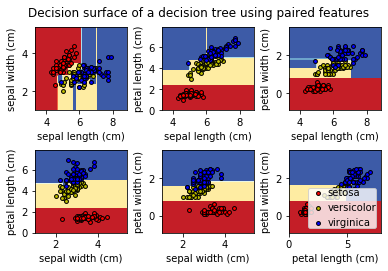

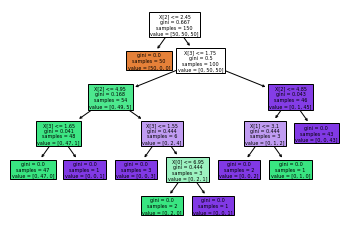

In [23]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

### Decision Tree Regression of a randomly generated synthetic data set


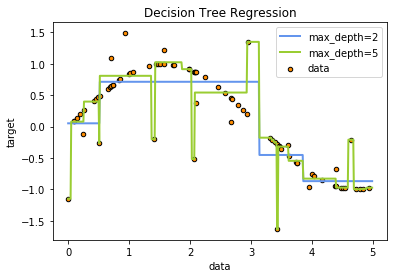

In [22]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
%matplotlib inline

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

exercise

1) Implement manually the random forest tree method and testing on iris data set 

2) Compare your implementation to sklearn

3) Apply the CART and random forest for Predicting and Forecasting Influenza based on the dataset `h7n9.csv`

4) Compare your results with the r-study which is included in the lab 4 folder.